## mse

mse:

$h = c_{p}T + gz + L_{v}q$

<br />
development of spatial variance of mass weighted vertically integrated mse:

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \text{forcing correlation terms}$

$h ^ \prime$ - moist static energy anomaly from the domain mean \
$\delta t$ - one day


In [1]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
import myPlots

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## snapshots of components

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
folder = '/Users/cbla0002/Documents/data/cmip6/' + model

In [3]:
fileName = model + '_mse_example_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds_example = xr.open_dataset(path)

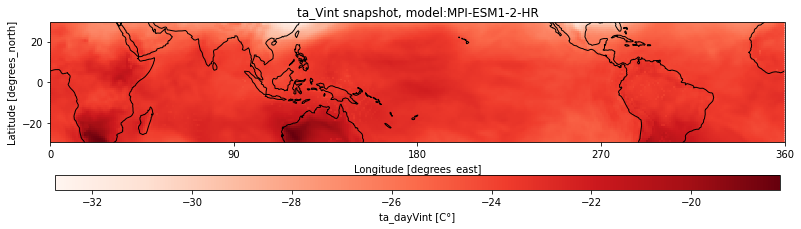

In [4]:
myPlots.plot_snapshot(ds_example.ta_dayVint, 'Reds', 'ta_Vint', model)

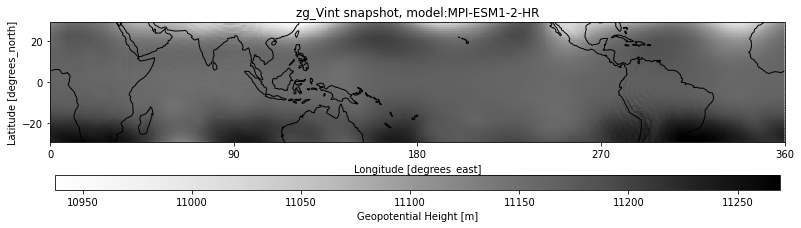

In [6]:
myPlots.plot_snapshot(ds_example.zg_dayVint, 'Greys', 'zg_Vint', model)

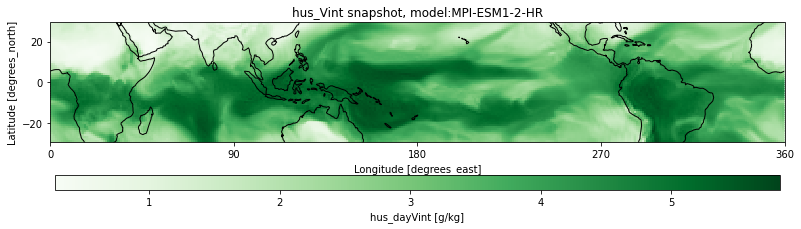

In [7]:
myPlots.plot_snapshot(ds_example.hus_dayVint, 'Greens', 'hus_Vint', model)

## mse squared anomaly

In [15]:
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 4, plev: 8, lat: 64, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    ta_day   (time, plev, lat, lon) float32 ...
    zg_day   (time, plev, lat, lon) float32 ...
    hus_day  (time, plev, lat, lon) float32 ...

In [16]:
ta = ds.ta_day
ta

<xarray.DataArray 'ta_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    C°

In [17]:
zg = ds.zg_day
zg

<xarray.DataArray 'zg_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential Height
    comment:        Geopotential is the sum of the specific gravitational pot...
    units:          m
    cell_methods:   time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:13Z altered by CMOR: Reordered dimension...

In [18]:
hus = ds.hus_day
hus

<xarray.DataArray 'hus_day' (time: 4, plev: 8, lat: 64, lon: 384)>
[786432 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1970-01-04T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    g/kg

In [44]:
c_p = 1.005
L_v = 2.256e6
mse = c_p*ta + zg + L_v*hus

In [43]:
mse_vInt = xr.DataArray(
    data=-scipy.integrate.simpson(mse.data, mse.plev.data, axis=1, even='last')/mse.plev.data[0],
    dims=['time','lat', 'lon'],
    coords={'time': mse.time.data, 'lat': mse.lat.data, 'lon': mse.lon.data}
    ,attrs={'units':''}
    )

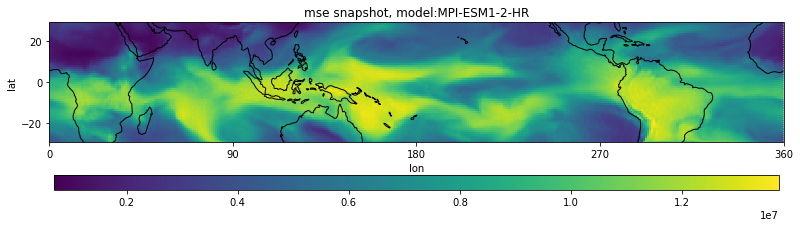

In [124]:
myPlots.plot_snapshot(mse_vInt.mean(dim='time'), 'viridis', 'mse', model)

In [42]:
mse_mean = mse_vInt.mean(dim=('lat','lon'))

In [49]:
mse_anom = mse_vInt - mse_mean

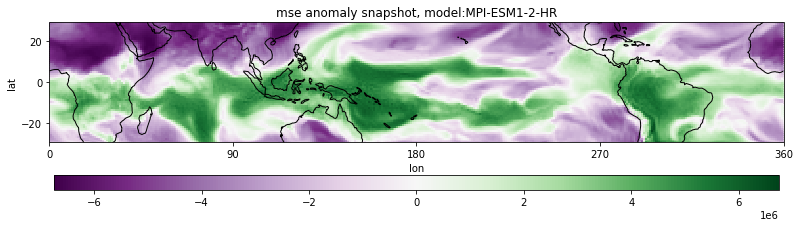

In [50]:
myPlots.plot_snapshot(mse_anom.isel(time=0), 'PRGn', 'mse anomaly', model)

In [51]:
mse_var = mse_anom**2

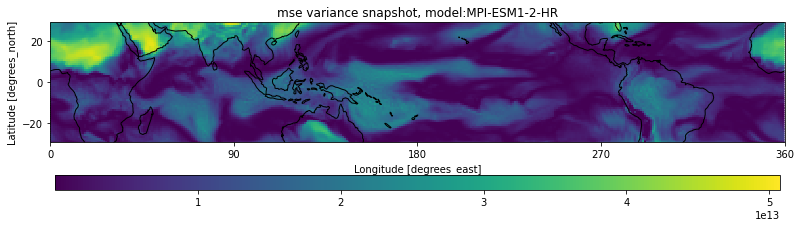

In [19]:
myPlots.plot_snapshot(mse_var.isel(time=0), 'viridis', 'mse variance', model)

In [109]:
# mse_2 = mse_var[1:,:,:]
# print(np.shape(mse_2))
# mse_1 = mse_var[0:-1,:,:]
# print(np.shape(mse_2))
# dmse = mse_2 - mse_1
# np.shape(dmse)
# a = np.ones(shape=(3,64,384))
# b = np.ones(shape=(3,64,384))
# print(np.shape(a-b))

In [119]:
np.shape(mse_var)

(4, 64, 384)

In [117]:
dmse = mse_var.isel(time=slice(1,4)).data-mse_var.isel(time=slice(0,3)).data
np.shape(dmse)

(3, 64, 384)

In [122]:
dmse = xr.DataArray(
    data=dmse,
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_var.time.data[0:len(mse_var)-1], 'lat': mse_var.lat.data, 'lon': mse_var.lon.data},
    attrs={'units':''}
    )

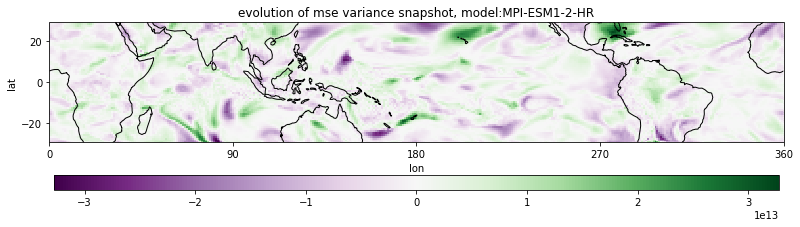

In [123]:
myPlots.plot_snapshot(dmse[0], 'PRGn', 'evolution of mse variance', model)